In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:2px;}
div.CodeMirror {font-family:Consolas; font-size:10pt;}
div.text_cell_render.rendered_html{font-size:10pt;}
div.output {font-size:10pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:10pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:11pt;padding:4px;}
table.dataframe{font-size:10px;}
</style>
"""))

<font size="5" color="red"><b>ch3. 분류분석</b></font>
# 1절. 분류분석 개요
## 1-1 분류분석이란?
- 타겟변수가 categorical인 분석
    * ex. 고객등급예측, 휴먼고객예측, 상품구매예측, 보험사기자예측
    * 수업ex. mnist 숫자데이터분류 예측, iris분류예측, 와인등급예측, 질병예측
    
- sklearning 패키지 : 예제데이터셋, 전처리, 머신러닝 모형 등의 제공

## 1-2 샘플용 데이터 셋 접근
### load 계열(패키지 내에 데이터 있음)
    - load_iris(), load_boston(), load_diabetes()...
### fetch 계열(패키지 내에 데이터가 없고, 인터넷 연결시 다운)
    - fetch_openml(), fetch_rov1(로이터뉴스 말뭉치)
### make 계열(가상의 데이터 생성)
    - make_classification() : 분류분석용 데이터 생성
    - make_regression() : 회귀분석용 데이터 생성
    - make_blobs() : 군집분석용 데이터 생성(타겟변수X)


In [3]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
# mnist load
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

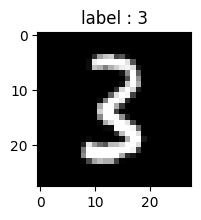

In [5]:
# 첫번째 이미지 출력
plt.figure(figsize=(4,2))
plt.imshow(X_train[50000], cmap='gray')
plt.title('label : {}'.format(y_train[50000]))
plt.show()

In [10]:
# fetch 계열(패키지내에 데이터가 없고, 인터넷 연결시 다운)
from sklearn.datasets import fetch_openml
# mnist fetch : mnist, iris, bostton, fashon-mnist, ...
mnist = fetch_openml(name='mnist_784', version=1, as_frame=False, parser='auto')
X, y = mnist.data, mnist.target.astype('int')
X.shape, y.shape

((70000, 784), (70000,))

Text(0.5, 1.0, 'label : 5')

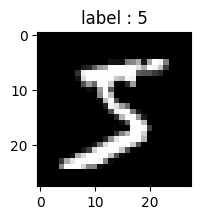

In [12]:
X = X.reshape(-1, 28, 28)
# 첫번째 이미지 출력
plt.figure(figsize=(4,2))
plt.imshow(X[0], cmap='gray')
plt.title('label : {}'.format(y[0]) )

# 2절. 분류분석의 종류
- predict()
## 2-1 확률적 모형
     - 주어진 데이터에 각 클래스가 정답일 확률을 계산하는 모형
     - predict_proba() : 각 분류 클래스별 확률을 알려줌(일부의 판별함수 모형에 있긴 함.
     - predict_log_proba() : 확률의 로그값을 알려줌
     
### 1) 확률적 생성 모형
        - 각 클래스별 특징 데이터 확률분포 추정(베이즈 정리를 사용), 소량의 데이터로도 작동
        - ex. Quadratic Discriminant Analysis, 나이브 베이지안
        
### 2) 확룰적 판별 모형
        - 확률을 계산하는 함수 이용
        - ex. 의사결정나무, 로지스틱 회귀
        
## 2-2 판별함수 모형
    - 주어진 데이터를 클래스에 따라 어떤 영역으로 나눠지는지 경제면을 찾은 후, 이 경계면으로부터 어느 위치에 있는지를 계산하는 판별함수를 이용
    - decision_function()
    - ex.퍼셉트론, 서포트벡터머신, MLP(신경망)
    
=> RandomForest, LGBM, LGBoost, CatBoots등의 앙상블 모형이 더 많이 쓰임

# 3절. 분류모형1. 확률적 생성 모형
- 베이즈 정리를 사용하여 확률분포 계산

## 3-1 QDA(Quadratic Discriminant Analysis)
- x가 연속형(실수)이면서 정규분포라고 가정함

In [14]:
# 생픔 데이터
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2, # 독립변수 갯수
                          n_informative=2,  # 타겟변수에 영향을 주는 독립변수 갯수
                          n_redundant=0,  # 타겟변수에 영향을 안 주는 독립변수 
                          n_clusters_per_class=1,  # 클래스 내 서브그룹수
                          n_classes=2,  # 타겟변수 clasdd수
                          n_samples=100,  # 데이터 갯수(행수. 기본값)
                          random_state=9,  # seed값
                          )
X.shape, y.shape

((100, 2), (100,))

In [16]:
import numpy as np
np.unique(y)

array([0, 1])

In [17]:
y.mean()

0.5

In [19]:
# y = 1인 데이터
X[y==1].shape

(50, 2)

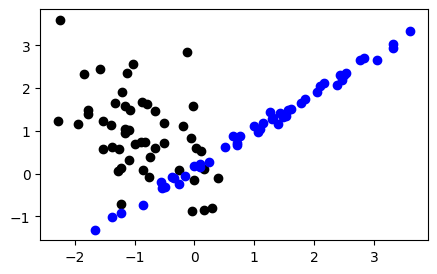

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
plt.scatter(X[y==0,0], X[y==0,1], c='k')
plt.scatter(X[y==1,0], X[y==1,1], c='b')

In [26]:
# (0,0) 대칭 구조
X[y==1] = -X[y==0]

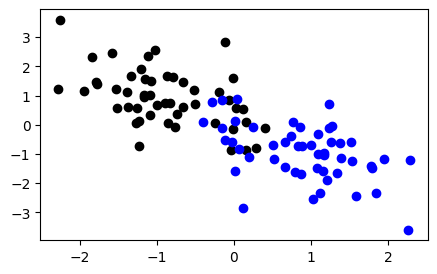

In [27]:
plt.figure(figsize=(5,3))
plt.scatter(X[y==0,0], X[y==0,1], c='k')
plt.scatter(X[y==1,0], X[y==1,1], c='b')

In [28]:
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis()
model.fit(X, y)

QuadraticDiscriminantAnalysis()

In [30]:
x = [[5, 5]]  # 2차원 데이터 predict
model.predict(x)[0]

1

In [31]:
p = model.predict_proba(x)
print(p)  # 0으로 분류될 확률, 1로 분류될 확률

[[8.84215536e-06 9.99991158e-01]]


In [36]:
model.classes_ # 분류될 내용


array([0, 1])

In [37]:
import pandas as pd
y_hat = model.predict(X)
pd.crosstab(y, y_hat)

col_0,0,1
row_0,,
0,44,6
1,6,44


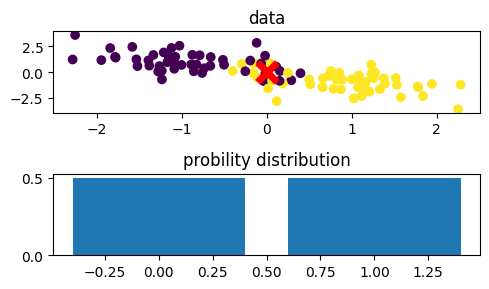

In [43]:
x = [[0,0]]
plt.figure(figsize=(5,3))
p = model.predict_proba(x)
plt.subplot(211)  # 2행 1열로 plt그래프 중 첫번쩨 그래프 ( 2, 1, 1)
plt.scatter(x=X[:,0], y=X[:,1], c=y)
plt.scatter(x=x[0][0], y=x[0][1], c='r', s=200, marker='x', lw=5)
plt.title('data')
plt.subplot(212)  # 2행 1열로 plt 그래프 중 두번째 그래프 ( 2, 1, 2)
plt.bar(model.classes_, p[0])
plt.title('probility distribution')
plt.tight_layout()
plt.show()

## 3-2 나이브베이지안 모형

In [52]:
# 데이터
import seaborn as sns
iris = sns.load_dataset('iris')
X = iris.iloc[:,:-1].values
y = iris.iloc[:, -1].values  # 범주형(문자) - 라벨인코딩 없이 적용
# 모형 생성
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X, y)  # 학습데이터는 numpy 배열로

MultinomialNB()

In [54]:
test_x = np.array([[5.1,3.5,1.4,0.2]])  # X.;oc[0]

print('test_x의 예측 : ', model.predict(test_x))
print(model.classes_)
print(model.predict_proba(test_x))

test_x의 예측 :  ['setosa']
['setosa' 'versicolor' 'virginica']
[[0.75199536 0.16092948 0.08707516]]


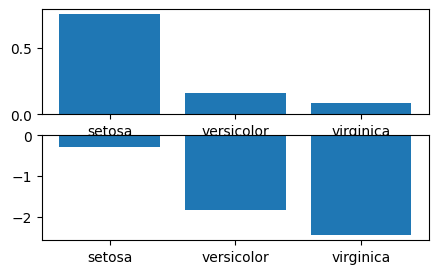

In [59]:
test_x = np.array([[5.1,3.5,1.4,0.2]])  # X.;oc[0]
plt.figure(figsize=(5,3))
plt.subplot(2, 1, 1)
plt.bar(model.classes_, model.predict_proba(test_x)[0])
plt.subplot(2, 1, 2)
plt.bar(model.classes_, model.predict_log_proba(test_x)[0])  # 로그 확률값
plt.show()

# 4절. 분류모형2. 확률적 판별모형
## 4-1 로지스틱 회귀분석

In [64]:
# 데이터
X, y = make_classification(n_features=1, # 독립변수
                          n_redundant=0, # 타겟변수에 영행을 미지치 않는 독립변수
                          n_informative=1, # 타켓변수에 영향을 미지는 독립변수
                          n_classes=2,  # 타겟변수의 class수(0,1)
                          n_clusters_per_class=1,
                          n_samples=100,  # 데이터 수
                          random_state=1
                          )
X.shape, y.shape

((100, 1), (100,))

In [66]:
np.unique(y), y.mean()

(array([0, 1]), 0.5)

In [67]:
# 모형생성
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X, y)

In [77]:
import numpy as np
xx = np.linspace(-3, 3, 100)  # -3 부터 3 까지 같은 간격의 데이터 100개
# xx의 행축 증가
test_x = xx.reshape(-1, 1)
test_x = xx[:, np.newaxis]
test_x = np.expand_dims(xx, axis=1)
test_x = xx[:, None]
y_hat = model.predict(test_x)
prob = model.predict_proba(test_x)
prob0 = prob[:,0]  # 0으로 분류될 확률
prob1 = prob[:,1]  # 1으로 분류될 확률

<BarContainer object of 2 artists>

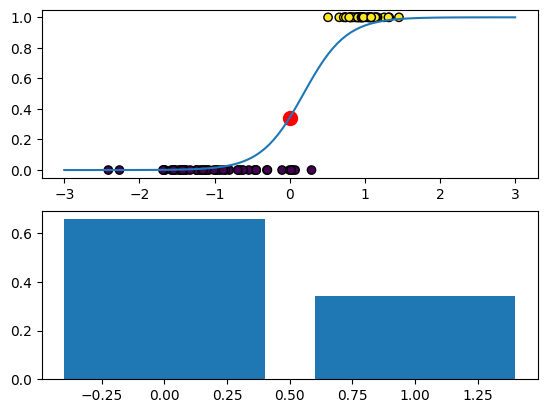

In [85]:
plt.subplot(211)
x = [[0]]
prob_x = model.predict_proba(x)
plt.scatter(X, y, c=y, edgecolors='k')
plt.plot(xx, prob1)
plt.scatter(x[0][0], prob_x[0][1], c='r', s=100)
plt.subplot(212)
plt.bar(model.classes_, prob_x[0])

## 4.2 의사결정나무
- **★ 종속변수에 영향을 주는 독립변수의 범주를 찾는 목적**

In [9]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data[:,2:]  # 2번째, 3번째 열만
y = data.target
feature_names = [name[:-5] for name in data.feature_names[2:]]
print(feature_names)

# 모형 생성
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='entropy',  # 분류품질 기준
                                 max_depth=1,
                                 random_state=0,
                                 )
dt_model.fit(X, y) # depth가 1이라 성능이 좋지 않을 때

print(X[50])
X[0]
test_x = [[4.7, 1.4]]
print('예측값 : ', dt_model.predict(test_x))
print(dt_model.classes_)
print(dt_model.predict_proba(test_x))

['petal length', 'petal width']
[4.7 1.4]
예측값 :  [1]
[0 1 2]
[[0.  0.5 0.5]]


In [8]:
print(X[50])
X[0]
test_x = [[4.7, 1.4]]
print('예측값 : ', dt_model.predict(test_x))
print(dt_model.classes_)
print(dt_model.predict_proba(test_x))

[4.7 1.4]
예측값 :  [1]
[0 1 2]
[[0.  0.5 0.5]]


In [10]:
# 분류모형의 시각화
import io
from sklearn.tree import export_graphviz
import pydot
from IPython.core.display import Image

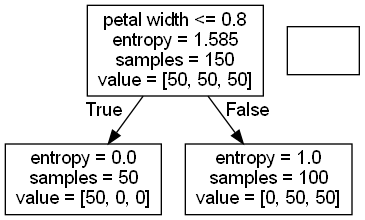

In [11]:
def draw_decision_tree(model, feature_names):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)
draw_decision_tree(dt_model, feature_names=feature_names)

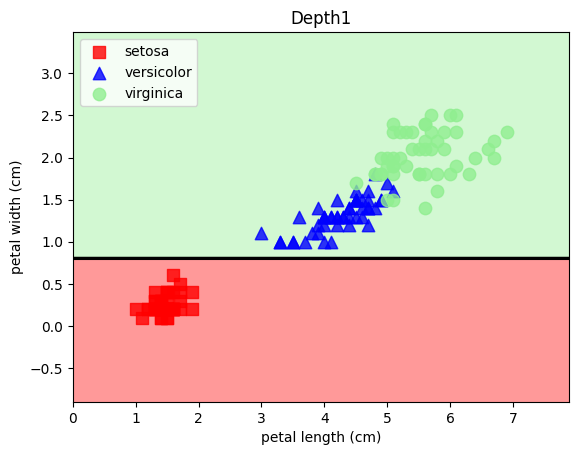

In [15]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, model, title):
    species = ['setosa', 'versicolor', 'virginica']
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
            c=[cmap(idx)], marker=markers[idx], s=80, label=species[cl])
        
    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)
    
    return Z
plot_decision_regions(X, y, dt_model, 'Depth1')
plt.show()

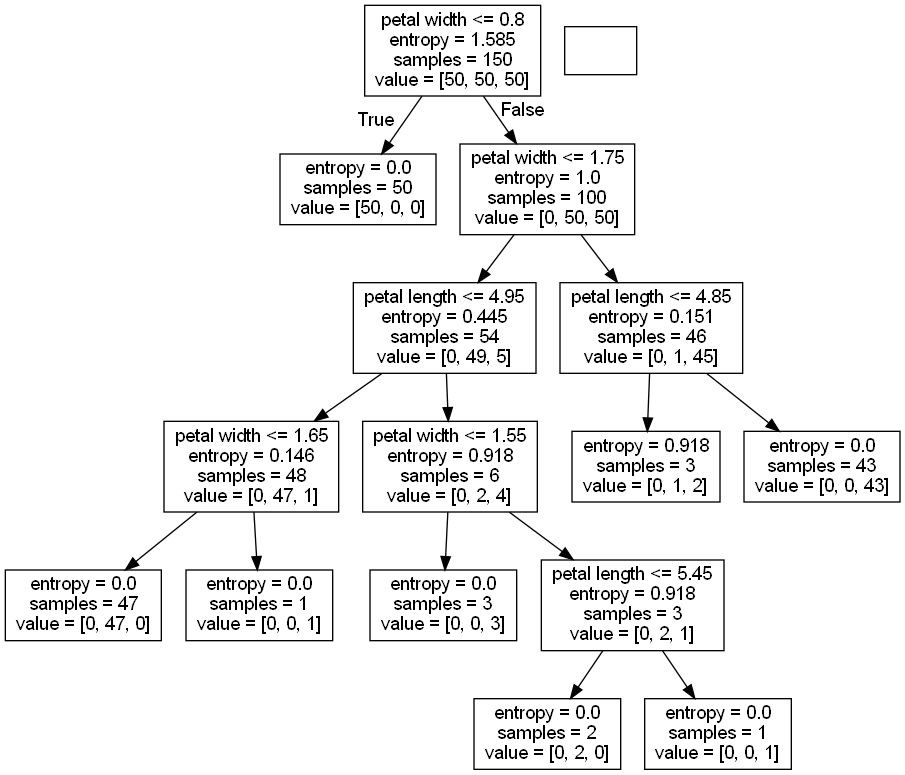

In [16]:
dt_model5 = DecisionTreeClassifier(criterion='entropy',
                                  max_depth=5,
                                  random_state=0)
dt_model5.fit(X, y)
draw_decision_tree(dt_model5, feature_names=feature_names)

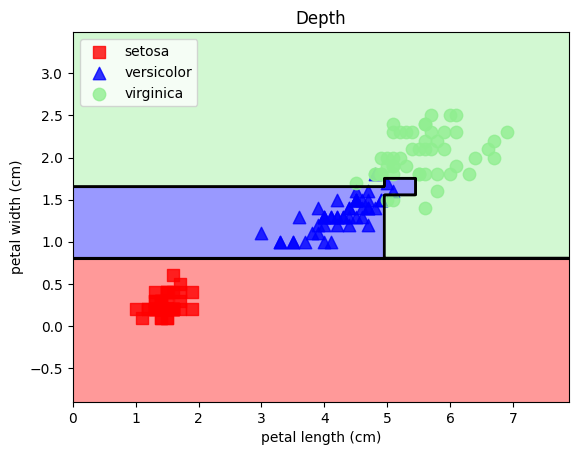

In [17]:
plot_decision_regions(X, y, dt_model5, 'Depth')
plt.show()

In [18]:
pred = dt_model5.predict(X)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# 5절. 분류모형3. 판별함수 모형
- SVM, 퍼센트론, MLP(predict_proba()있음),...
- predict_prob대신 decision_function()
## 5-1 SVM의 SVC

In [24]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
idx = pd.Series(iris.target).isin([0, 2])
print(idx.tolist())

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


In [25]:
X = iris.data[idx]
y = iris.target[idx]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
from sklearn.svm import SVC
model = SVC()
model.fit(X, y)

SVC()

In [27]:
y_hat = model.predict(X)
pd.crosstab(y, y_hat)

col_0,0,2
row_0,,
0,50,0
2,0,50


In [28]:
X[0]
x = [[5.1, 3.5, 1.4, 0.2]]
model.predict(x)
model.decision_function(x)

array([-1.14828042])

## 5-2 퍼센트론

In [29]:
from sklearn.linear_model import Perceptron
model = Perceptron(max_iter=100,  # 학습횟수 epoch 100회
                  eta0=0.1,  # learning late
                  random_state=1).fit(X,y)


In [30]:
y_hat = model.predict(X)
pd.crosstab(y, y_hat)

col_0,0,2
row_0,,
0,50,0
2,0,50


In [33]:
x = [[5.1, 3.5, 1.4, 0.2]]
pred = model.predict(x)
df   = model.decision_function(x)
print('예측값 : ', pred)
print('판별함수 결과 : ', df)

예측값 :  [0]
판별함수 결과 :  [-0.601]


## 5-3 다증퍼셉트론(인공신경망)
- predict / decision_function / predict_ proba / predict_proba

In [34]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50, 50, 50),
                   max_iter=500,
                    activation='relu',
                   )
mlp.fit(X, y)
y_hat = model.predict(X)
pd.crosstab(y, y_hat)

col_0,0,2
row_0,,
0,50,0
2,0,50


# 6절. 분류모형 성능평가
- 혼동행렬(교차표)
- score함수 : accuracy, recall, precision,  f1_score, fdeta_score
- ROC커브 -> roc커브 양역 확인
- ex. 두 모형이 혼동행렬이 같은 경우
## 6-1 혼동행렬(교차표)

In [35]:
y_true = [1, 1, 0, 0, 2, 1, 0, 2, 2]  # 실제값
y_pred = [1, 1, 0, 1, 1, 0, 0, 2, 1]  # 예측값 
# 혼동행렬
from sklearn.metrics import confusion_matrix   # 그룹이 2개일 때
confusion_matrix(y_true, y_pred)

array([[2, 1, 0],
       [1, 2, 0],
       [0, 2, 1]], dtype=int64)

In [36]:
# 교차표
pd.crosstab(y_true, y_pred, colnames=['예측값'], rownames=['실제값'])  # 그룹이 3ㅐ

예측값,0,1,2
실제값,,,
0,2,1,0
1,1,2,0
2,0,2,1


## 6-2 혼동행렬을 이용한 평가
- 각종 score() 함수

In [45]:
result = pd.read_csv('data/model_result.csv')  # 보험사기자 예측 실제값과 예측값
result.sample(5)

,CUST_ID,y_true,y_pred
1266,15904,0,0
1659,20759,0,0
706,8466,0,0
878,10788,0,0
688,8228,1,0


In [46]:
result.isnull().sum()

CUST_ID    0
y_true     0
y_pred     0
dtype: int64

In [47]:
result.shape

(1793, 3)

In [48]:
result['y_true'].value_counts()

0    1635
1     158
Name: y_true, dtype: int64

In [49]:
pd.crosstab(result.y_true, 
            result.y_pred,
           margins=True,  # 합계 출력
           colnames=['예측값'],
           rownames=['실제값'],
           )

예측값,0,1,All
실제값,,,
0,1613,22,1635
1,81,77,158
All,1694,99,1793


In [50]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, fbeta_score
# 정확도 : 전체 중에서 맞게 예측한 확률
accuracy_score(result.y_true, result.y_pred)

0.9425543781372002

In [51]:
# 정밀도(precision) : positive로 예측한 것 중에 맞게 예측한 확률
precision_score(result.y_true, result.y_pred)

0.7777777777777778

In [52]:
# 재현율(recall) : 실제 positive 중 맞게 예측한 확률
recall_score(result.y_true, result.y_pred)

0.4873417721518987

In [53]:
# 특이도(specificity) : 실제 negative 중 맞게 예측한 확률
recall_score(result.y_true, result.y_pred, pos_label=0)

0.9865443425076452

In [ ]:
# 위양성율(fprate) : FN / (TN+FP) ; 실제 negative인데 positive로 예측한 확률
# 함수 없음

In [54]:
# f1 score : recall과 precision 조화평균
f1_score(result.y_true, result.y_pred)

0.5992217898832685

In [55]:
# beta=1 : f1_score - recall과 precision의 비중을 같게
fbeta_score(result.y_true, result.y_pred, beta=1)

0.5992217898832685

In [56]:
# beta=2 : f1_score - recall과 precision의 비중을 낮게
fbeta_score(result.y_true, result.y_pred, beta=2)

0.5266757865937073

In [57]:
# beta=0.5 : f1_score - recall의 가중치를 낮게 precision의 비중을 높게
fbeta_score(result.y_true, result.y_pred, beta=0.5)

0.6949458483754513

## 6-3 ROC커브를 이용한 성능 비교
- ROC그래프의 가로축 위양성율(fprate : False Positive rate), 세로축 recall값

In [58]:
from sklearn.datasets import make_classification
X, y = make_classification(weights=[0.95,0.05],  # 0 : 95%  , 1 : 5% 
                          n_samples=1000,
                          random_state=5)
X.shape, y.shape

((1000, 20), (1000,))

In [60]:
np.unique(y), y.mean()

(array([0, 1]), 0.057)

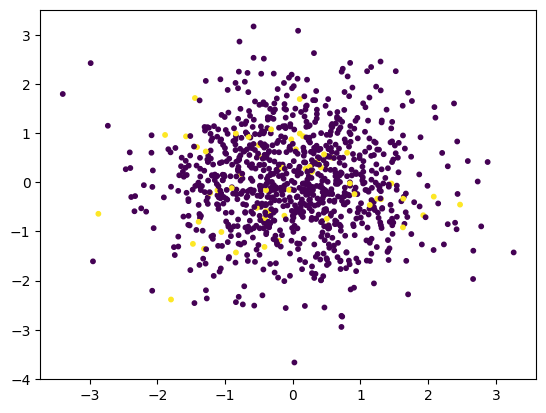

In [62]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, s=10)

In [63]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X, y)

LogisticRegression(random_state=0)

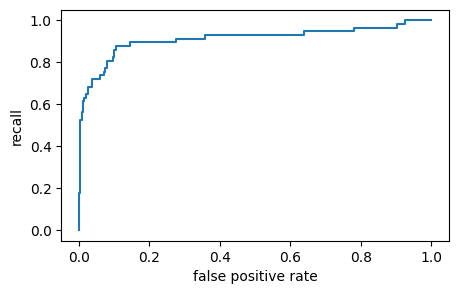

In [65]:
from sklearn.metrics import roc_curve
fpr, tpr, thr = roc_curve(y, model.decision_function(X))
plt.figure(figsize=(5,3))
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('recall')
plt.show()

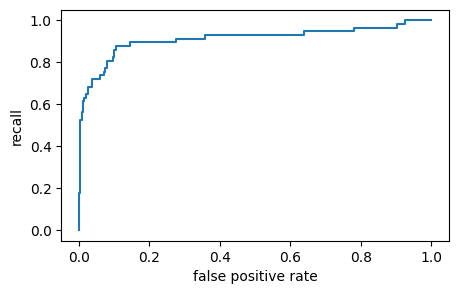

In [67]:
y_prona = model.predict_proba(X)[:,1]
fpr1, tpr1, thr1 = roc_curve(y, y_prona)
plt.figure(figsize=(5,3))
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('recall')
plt.show()

## 6-4 두 모형의 혼동행렬이 같은 경우 (roc_curve사용)

In [68]:
from sklearn.datasets import make_classification
X, y = make_classification(weights=[0.95,0.05],  # 0 : 95%  , 1 : 5% 
                          n_samples=1000,
                          random_state=5)


In [70]:
from sklearn.svm import SVC
model1 = LogisticRegression().fit(X, y)
model2 = SVC(gamma=0.0001,  # 작을수록 경계면이 부드러문 곡선
            C=3000,  # 오차 허용
            probability=True,  
            ).fit(X, y)

In [71]:
y_hat1 = model1.predict(X)
y_hat2 = model2.predict(X)

In [73]:
display(pd.crosstab(y, y_hat1))
display(pd.crosstab(y, y_hat2))

col_0,0,1
row_0,,
0,940,3
1,30,27


col_0,0,1
row_0,,
0,940,3
1,30,27


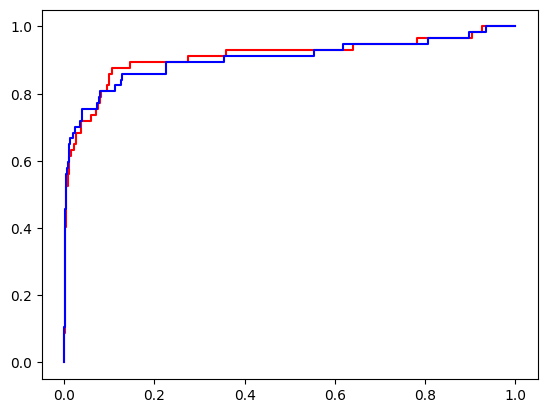

In [75]:
# 혼동행렬이 같으므로 모든 score값이 같음
# roc커브로 두 모델 성능 비교
fpr1, tpr1, th1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, th2 = roc_curve(y, model2.decision_function(X))
plt.plot(fpr1, tpr1, color='r')
plt.plot(fpr2, tpr2, color='b')
plt.show()

In [76]:
# AUC(Area Under Curve) : roc커브 아랫부분의 영역
# AUC = 1 : 완벽한 모델
# AUC < 0.5 : 최악의 모델
# AUC = 0.5 : 동전던지기와 일치
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2)

(0.9112202563673234, 0.9037227214377407)

=== 와인 품질 데이터 기본 정보 ===
데이터 크기: (1599, 12)
특성 개수: 11
샘플 개수: 1599

=== 데이터 컬럼 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

=== 처음 5개 데이터 ===
   fixed acidity  

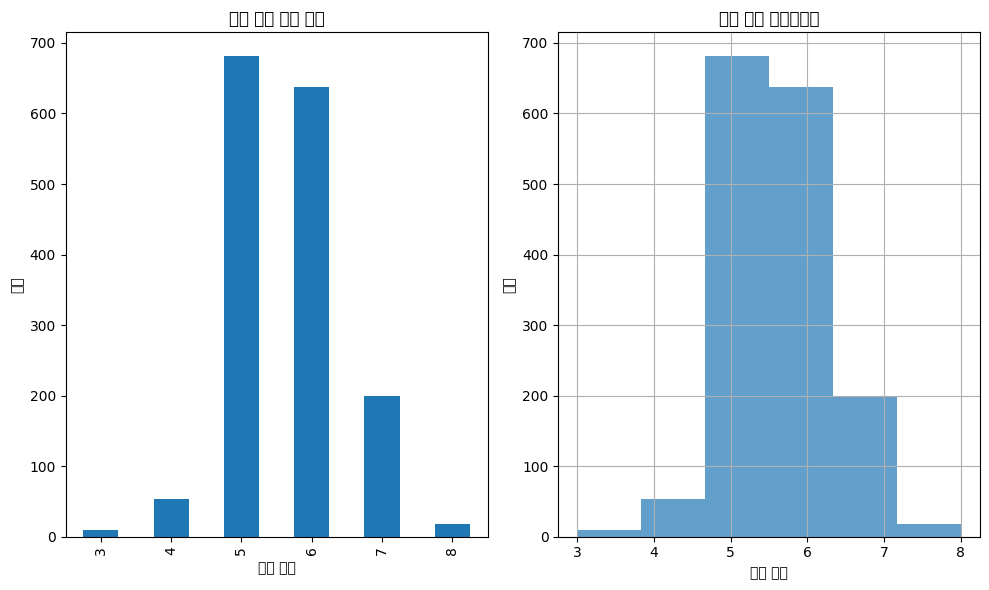


=== 데이터 탐색 결과 해석 ===
1. 와인 품질은 3~8점 범위 (6개 클래스)
2. 대부분의 와인이 5~6점 (클래스 불균형 존재)
3. 결측값 없음
4. 모든 특성이 수치형 데이터

2단계: 데이터 전처리 및 모델 준비
특성 데이터 크기: (1599, 11)
타겟 데이터 크기: (1599,)

=== 특성별 스케일 확인 ===
특성명		최소값	최대값	평균		표준편차
------------------------------------------------------------
fixed acidity  	4.60	15.90	8.32		1.74
volatile acidity	0.12	1.58	0.53		0.18
citric acid    	0.00	1.00	0.27		0.19
residual sugar 	0.90	15.50	2.54		1.41
chlorides      	0.01	0.61	0.09		0.05
free sulfur dioxide	1.00	72.00	15.87		10.46
total sulfur dioxide	6.00	289.00	46.47		32.90
density        	0.99	1.00	1.00		0.00
pH             	2.74	4.01	3.31		0.15
sulphates      	0.33	2.00	0.66		0.17
alcohol        	8.40	14.90	10.42		1.07

💡 스케일 차이가 큰 특성들이 있습니다!
   예: total sulfur dioxide (6~289) vs fixed acidity (4.6~15.9)
   → 표준화(StandardScaler) 필요!

=== 데이터 분할 결과 ===
훈련 데이터: 1279개
테스트 데이터: 320개
분할 비율: 80.0% : 20.0%

=== 클래스 분포 확인 ===
훈련 세트 클래스 분포:
3      8
4     42
5    545
6    510
7    159
8     15
Name: quality, dtype: int64


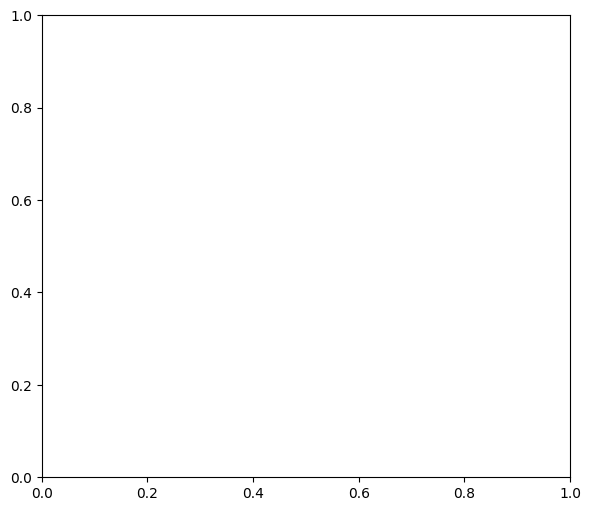

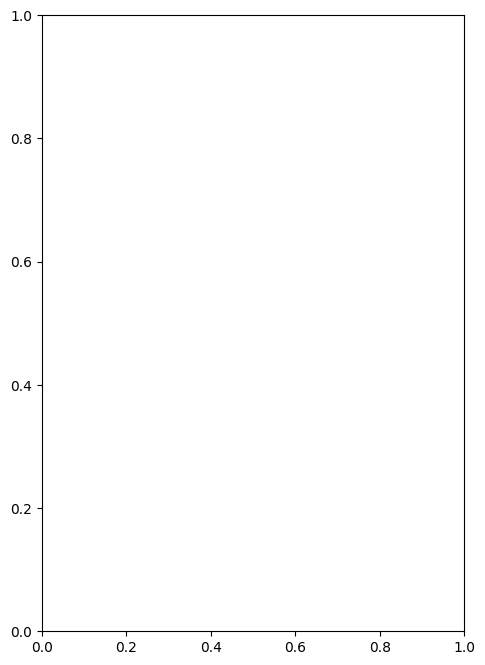

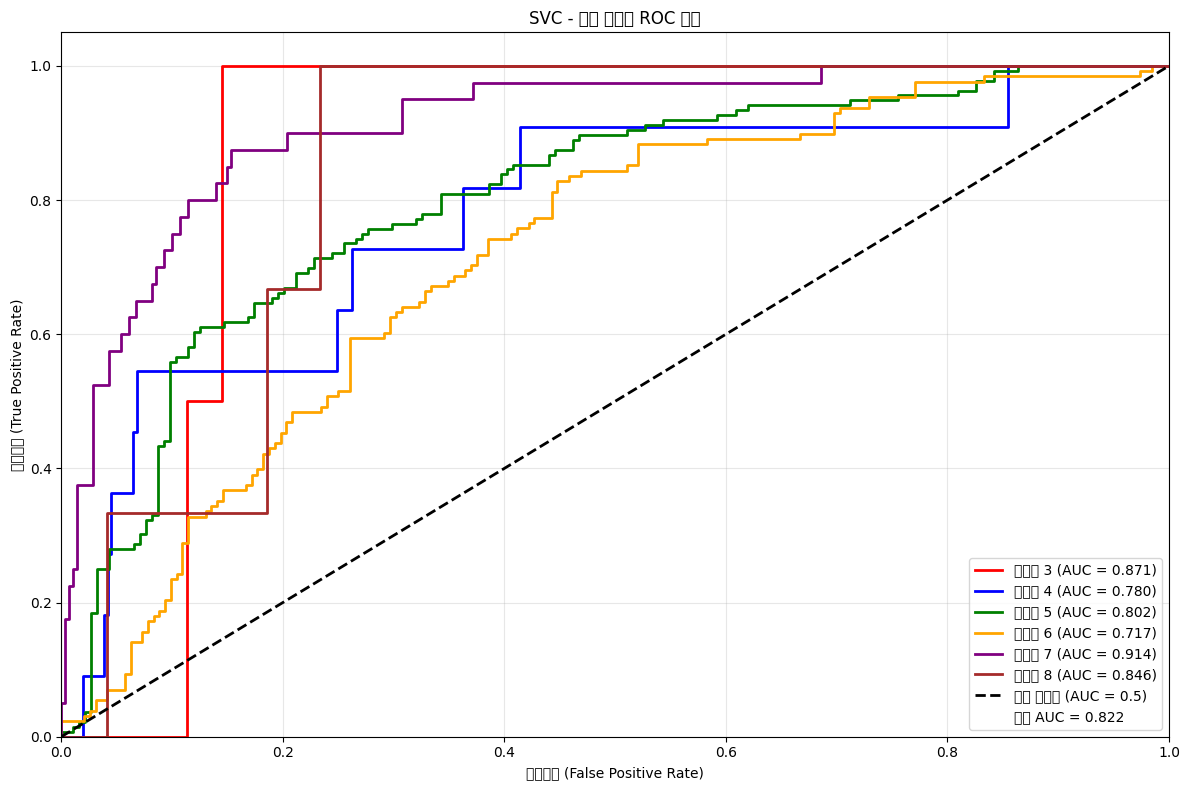


🎯 최종 종합 분석 및 결론

=== 📊 성능 비교 요약 ===
모델                   정확도        F1-Score   AUC       
--------------------------------------------------
LogisticRegression   0.5844     0.5461     0.7490    
SVC                  0.6250     0.6023     0.8217    

=== 🔍 모델별 특징 분석 ===
📈 LogisticRegression:
  장점: 해석 가능, 빠른 학습, 안정적 성능
  단점: 선형 결정 경계로 복잡한 패턴 학습 한계
  적합한 경우: 해석이 중요한 업무, 실시간 예측 필요

📈 SVC:
  장점: 비선형 패턴 학습, 강력한 일반화 성능
  단점: 학습 시간 오래 걸림, 해석 어려움
  적합한 경우: 복잡한 패턴 존재, 높은 정확도 필요

=== 🎯 실무 적용 관점 ===
🍷 와인 품질 예측에서:
  - 클래스 불균형 문제 (5-6점 와인이 대부분)
  - 극단적 품질(3,8점) 예측 어려움
  - 인접한 등급 간 구분 어려움 (5점 vs 6점)

=== 🚀 개선 방향 제안 ===
1. 클래스 불균형 해결:
   - SMOTE 등 오버샘플링 기법 적용
   - 클래스 가중치 조정

2. 특성 공학:
   - 특성 간 상호작용 변수 생성
   - 다항식 특성 추가
   - 특성 선택 기법 적용

3. 앙상블 모델:
   - RandomForest, GradientBoosting 시도
   - 여러 모델의 투표 방식 결합

4. 하이퍼파라미터 튜닝:
   - GridSearchCV, RandomizedSearchCV 활용
   - 교차 검증을 통한 최적 파라미터 찾기

=== 🏆 최종 결론 ===
✅ SVC가 이번 데이터에서 더 우수한 성능을 보였습니다!
   - 복잡한 패턴을 잘 학습함
   - 높은 정확도가 필요한 경우 적합

📚 다음 학습 방향:
1. 다른 알

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
# specificity_score는 scikit-learn에 없는 함수이므로 제거
import warnings
warnings.filterwarnings('ignore')

# 데이터 로드
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

print("=== 와인 품질 데이터 기본 정보 ===")
print(f"데이터 크기: {df.shape}")
print(f"특성 개수: {df.shape[1] - 1}")
print(f"샘플 개수: {df.shape[0]}")
print()

print("=== 데이터 컬럼 정보 ===")
print(df.info())
print()

print("=== 처음 5개 데이터 ===")
print(df.head())
print()

print("=== 와인 품질 등급 분포 ===")
print(df['quality'].value_counts().sort_index())
print()

print("=== 기본 통계량 ===")
print(df.describe())

# 품질 등급 분포 시각화
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
df['quality'].value_counts().sort_index().plot(kind='bar')
plt.title('와인 품질 등급 분포')
plt.xlabel('품질 등급')
plt.ylabel('개수')

plt.subplot(1, 2, 2)
df['quality'].hist(bins=6, alpha=0.7)
plt.title('품질 등급 히스토그램')
plt.xlabel('품질 등급')
plt.ylabel('빈도')
plt.tight_layout()
plt.show()

print("\n=== 데이터 탐색 결과 해석 ===")
print("1. 와인 품질은 3~8점 범위 (6개 클래스)")
print("2. 대부분의 와인이 5~6점 (클래스 불균형 존재)")
print("3. 결측값 없음")
print("4. 모든 특성이 수치형 데이터")

# ================================
# 2단계: 데이터 전처리 및 모델 준비
# ================================

print("\n" + "="*50)
print("2단계: 데이터 전처리 및 모델 준비")
print("="*50)

# 특성과 타겟 분리
X = df.drop('quality', axis=1)
y = df['quality']

print(f"특성 데이터 크기: {X.shape}")
print(f"타겟 데이터 크기: {y.shape}")
print()

# 각 특성의 스케일 확인
print("=== 특성별 스케일 확인 ===")
print("특성명\t\t최소값\t최대값\t평균\t\t표준편차")
print("-" * 60)
for col in X.columns:
    print(f"{col:<15}\t{X[col].min():.2f}\t{X[col].max():.2f}\t{X[col].mean():.2f}\t\t{X[col].std():.2f}")

print("\n💡 스케일 차이가 큰 특성들이 있습니다!")
print("   예: total sulfur dioxide (6~289) vs fixed acidity (4.6~15.9)")
print("   → 표준화(StandardScaler) 필요!")

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n=== 데이터 분할 결과 ===")
print(f"훈련 데이터: {X_train.shape[0]}개")
print(f"테스트 데이터: {X_test.shape[0]}개")
print(f"분할 비율: {X_train.shape[0]/len(X)*100:.1f}% : {X_test.shape[0]/len(X)*100:.1f}%")

# 훈련/테스트 세트의 클래스 분포 확인
print("\n=== 클래스 분포 확인 ===")
print("훈련 세트 클래스 분포:")
print(pd.Series(y_train).value_counts().sort_index())
print("\n테스트 세트 클래스 분포:")
print(pd.Series(y_test).value_counts().sort_index())

# 특성 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n=== 표준화 후 확인 ===")
print(f"표준화 전 특성 평균: {X_train.mean().mean():.2f}")
print(f"표준화 후 특성 평균: {X_train_scaled.mean():.2f}")
print(f"표준화 전 특성 표준편차: {X_train.std().mean():.2f}")
print(f"표준화 후 특성 표준편차: {X_train_scaled.std():.2f}")

print("\n✅ 전처리 완료!")
print("   - 특성-타겟 분리 ✓")
print("   - 훈련-테스트 분할 ✓") 
print("   - 표준화 ✓")
print("   - 클래스 분포 유지 ✓")

# ================================
# 3단계: 모델 구현 및 학습
# ================================

print("\n" + "="*50)
print("3단계: 모델 구현 및 학습")
print("="*50)

# 필요한 모델들 import
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

print("=== 선택한 모델들 ===")
print("1. 확률적 모형: LogisticRegression")
print("   - 선형 결정 경계, 확률 출력 가능")
print("   - 다중 클래스 분류에 적합")
print("   - 해석 가능한 모델")

print("\n2. 판별함수 모형: SVC (Support Vector Classifier)")
print("   - 비선형 결정 경계 가능 (RBF 커널)")
print("   - 복잡한 패턴 학습 가능")
print("   - 강력한 일반화 성능")

# 모델 초기화
print("\n=== 모델 초기화 ===")

# 1. 확률적 모형 - LogisticRegression
lr_model = LogisticRegression(
    random_state=42,
    max_iter=1000,
    multi_class='ovr'  # One-vs-Rest 전략
)

# 2. 판별함수 모형 - SVC
svc_model = SVC(
    random_state=42,
    kernel='rbf',
    probability=True,  # ROC 곡선을 위해 확률 예측 활성화
    gamma='scale'
)

print("✅ 모델 초기화 완료")

# 모델 학습
print("\n=== 모델 학습 시작 ===")
print("LogisticRegression 학습 중...")
lr_model.fit(X_train_scaled, y_train)
print("✅ LogisticRegression 학습 완료")

print("\nSVC 학습 중...")
svc_model.fit(X_train_scaled, y_train)
print("✅ SVC 학습 완료")

# 예측 수행
print("\n=== 예측 수행 ===")
lr_pred = lr_model.predict(X_test_scaled)
lr_pred_proba = lr_model.predict_proba(X_test_scaled)

svc_pred = svc_model.predict(X_test_scaled)
svc_pred_proba = svc_model.predict_proba(X_test_scaled)

print("✅ 예측 완료")

# 기본 정확도 확인
print("\n=== 기본 정확도 ===")
lr_accuracy = accuracy_score(y_test, lr_pred)
svc_accuracy = accuracy_score(y_test, svc_pred)

print(f"LogisticRegression 정확도: {lr_accuracy:.4f}")
print(f"SVC 정확도: {svc_accuracy:.4f}")

print(f"\n현재까지 {'SVC' if svc_accuracy > lr_accuracy else 'LogisticRegression'}가 더 높은 정확도를 보입니다!")

# ================================
# 4단계: 상세한 성능 평가
# ================================

print("\n" + "="*50)
print("4단계: 상세한 성능 평가")
print("="*50)

# 성능 평가 함수 정의
def calculate_specificity(y_true, y_pred):
    """다중 클래스에서 특이도를 계산하는 함수"""
    cm = confusion_matrix(y_true, y_pred)
    classes = sorted(set(y_true))
    specificities = []
    
    for i, class_label in enumerate(classes):
        # 각 클래스별 특이도 계산
        tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
        fp = cm[:, i].sum() - cm[i, i]
        
        if tn + fp > 0:
            specificity = tn / (tn + fp)
            specificities.append(specificity)
    
    return np.mean(specificities)

def calculate_fpr(y_true, y_pred):
    """위양성률(False Positive Rate) 계산"""
    return 1 - calculate_specificity(y_true, y_pred)

def evaluate_model(y_true, y_pred, y_pred_proba, model_name):
    """모델 성능을 종합적으로 평가하는 함수"""
    
    print(f"\n{'='*30}")
    print(f"📊 {model_name} 성능 평가")
    print(f"{'='*30}")
    
    # 1. 혼동행렬 (Confusion Matrix)
    cm = confusion_matrix(y_true, y_pred)
    print("\n=== 혼동행렬 (Confusion Matrix) ===")
    print("실제\\예측", end="")
    for i in sorted(set(y_true)):
        print(f"\t{i}", end="")
    print()
    
    for i, (actual_class, row) in enumerate(zip(sorted(set(y_true)), cm)):
        print(f"{actual_class}\t", end="")
        for val in row:
            print(f"{val}\t", end="")
        print()
    
    # 2. 기본 지표들
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    specificity = calculate_specificity(y_true, y_pred)
    fpr = calculate_fpr(y_true, y_pred)
    
    print(f"\n=== 기본 성능 지표 ===")
    print(f"정확도 (Accuracy): {accuracy:.4f}")
    print(f"정밀도 (Precision): {precision:.4f}")
    print(f"재현율 (Recall): {recall:.4f}")
    print(f"특이도 (Specificity): {specificity:.4f}")
    print(f"위양성률 (FPR): {fpr:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    print(f"\n💡 지표 해석:")
    print(f"   재현율 {recall:.3f} : 실제 정답 중 {recall*100:.1f}% 맞춤")
    print(f"   정밀도 {precision:.3f} : 예측한 것 중 {precision*100:.1f}% 맞춤")
    print(f"   특이도 {specificity:.3f} : 실제 음성 중 {specificity*100:.1f}% 맞춤")
    
    # 3. 클래스별 상세 성능
    print(f"\n=== 클래스별 상세 성능 ===")
    report = classification_report(y_true, y_pred, output_dict=True)
    
    print("클래스\t정밀도\t재현율\tF1-Score\t샘플수")
    print("-" * 50)
    for class_name in sorted([str(c) for c in set(y_true)]):
        if class_name in report:
            p = report[class_name]['precision']
            r = report[class_name]['recall']
            f = report[class_name]['f1-score']
            s = report[class_name]['support']
            print(f"{class_name}\t{p:.4f}\t{r:.4f}\t{f:.4f}\t\t{s}")
    
    # 4. 다중 클래스 ROC-AUC 계산
    try:
        # One-vs-Rest 방식으로 AUC 계산
        auc_scores = []
        classes = sorted(set(y_true))
        
        for i, class_label in enumerate(classes):
            # 이진 분류로 변환 (현재 클래스 vs 나머지)
            y_binary = (y_true == class_label).astype(int)
            class_prob = y_pred_proba[:, i]
            
            if len(set(y_binary)) > 1:  # 클래스가 실제로 존재하는 경우만
                auc = roc_auc_score(y_binary, class_prob)
                auc_scores.append(auc)
        
        avg_auc = np.mean(auc_scores)
        print(f"\n=== ROC-AUC 점수 ===")
        print(f"평균 AUC (One-vs-Rest): {avg_auc:.4f}")
        
    except Exception as e:
        print(f"\nROC-AUC 계산 중 오류: {e}")
        avg_auc = 0
    
    # 5. 성능 요약
    print(f"\n=== 🎯 {model_name} 성능 요약 ===")
    print(f"✅ 정확도: {accuracy:.4f}")
    print(f"✅ F1-Score: {f1:.4f}")
    print(f"✅ 평균 AUC: {avg_auc:.4f}")
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'specificity': specificity,
        'fpr': fpr,
        'auc': avg_auc,
        'confusion_matrix': cm
    }

# 두 모델 성능 평가
lr_results = evaluate_model(y_test, lr_pred, lr_pred_proba, "LogisticRegression")
svc_results = evaluate_model(y_test, svc_pred, svc_pred_proba, "SVC")

# 모델 비교
print("\n" + "="*50)
print("🏆 모델 비교 결과")
print("="*50)

print(f"\n{'지표':<15} {'LogisticRegression':<20} {'SVC':<20} {'승리':<10}")
print("-" * 70)

metrics = ['accuracy', 'precision', 'recall', 'f1', 'auc']
metric_names = ['정확도', '정밀도', '재현율', 'F1-Score', 'AUC']

winners = []
for metric, name in zip(metrics, metric_names):
    lr_val = lr_results[metric]
    svc_val = svc_results[metric]
    winner = "LogisticRegression" if lr_val > svc_val else "SVC"
    winners.append(winner)
    
    print(f"{name:<15} {lr_val:<20.4f} {svc_val:<20.4f} {winner:<10}")

# 최종 승리자 결정
lr_wins = winners.count("LogisticRegression")
svc_wins = winners.count("SVC")

print(f"\n🏆 최종 결과:")
print(f"LogisticRegression 승리: {lr_wins}개 지표")
print(f"SVC 승리: {svc_wins}개 지표")

if lr_wins > svc_wins:
    print("\n🎉 LogisticRegression이 더 우수한 모델입니다!")
    best_model = "LogisticRegression"
    best_results = lr_results
elif svc_wins > lr_wins:
    print("\n🎉 SVC가 더 우수한 모델입니다!")
    best_model = "SVC"
    best_results = svc_results
else:
    print("\n🤝 두 모델이 비슷한 성능을 보입니다!")
    # F1-Score가 더 높은 모델을 선택
    if lr_results['f1'] > svc_results['f1']:
        best_model = "LogisticRegression"
        best_results = lr_results
    else:
        best_model = "SVC"
        best_results = svc_results

print(f"\n📊 최고 성능 모델: {best_model}")
print(f"   정확도: {best_results['accuracy']:.4f}")
print(f"   F1-Score: {best_results['f1']:.4f}")
print(f"   AUC: {best_results['auc']:.4f}")

# ================================
# 5단계: ROC 곡선 시각화 및 최종 분석
# ================================

print("\n" + "="*50)
print("5단계: ROC 곡선 시각화 및 최종 분석")
print("="*50)

# ROC 곡선 그리기
def plot_multiclass_roc(y_true, y_pred_proba, model_name, classes):
    """다중 클래스 ROC 곡선을 그리는 함수"""
    
    plt.figure(figsize=(12, 8))
    
    # 각 클래스별 ROC 곡선
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
    all_fpr = []
    all_tpr = []
    all_auc = []
    
    for i, (class_label, color) in enumerate(zip(classes, colors)):
        # 이진 분류로 변환
        y_binary = (y_true == class_label).astype(int)
        
        if len(set(y_binary)) > 1:  # 해당 클래스가 실제로 존재하는 경우
            class_prob = y_pred_proba[:, i]
            
            fpr, tpr, _ = roc_curve(y_binary, class_prob)
            auc = roc_auc_score(y_binary, class_prob)
            
            all_fpr.append(fpr)
            all_tpr.append(tpr)
            all_auc.append(auc)
            
            plt.plot(fpr, tpr, color=color, lw=2, 
                    label=f'클래스 {class_label} (AUC = {auc:.3f})')
    
    # 대각선 (랜덤 분류기)
    plt.plot([0, 1], [0, 1], 'k--', lw=2, label='랜덤 분류기 (AUC = 0.5)')
    
    # 평균 AUC 표시
    avg_auc = np.mean(all_auc)
    plt.plot([], [], ' ', label=f'평균 AUC = {avg_auc:.3f}')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('위양성률 (False Positive Rate)')
    plt.ylabel('참양성률 (True Positive Rate)')
    plt.title(f'{model_name} - 다중 클래스 ROC 곡선')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    
    return avg_auc

# 클래스 정보
classes = sorted(set(y_test))
print(f"클래스 개수: {len(classes)}")
print(f"클래스 목록: {classes}")

# 두 모델의 ROC 곡선 그리기
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
lr_avg_auc = plot_multiclass_roc(y_test, lr_pred_proba, "LogisticRegression", classes)

plt.subplot(1, 2, 2)
svc_avg_auc = plot_multiclass_roc(y_test, svc_pred_proba, "SVC", classes)

plt.tight_layout()
plt.show()

# 최종 종합 분석
print("\n" + "="*50)
print("🎯 최종 종합 분석 및 결론")
print("="*50)

print(f"\n=== 📊 성능 비교 요약 ===")
print(f"{'모델':<20} {'정확도':<10} {'F1-Score':<10} {'AUC':<10}")
print("-" * 50)
print(f"{'LogisticRegression':<20} {lr_results['accuracy']:<10.4f} {lr_results['f1']:<10.4f} {lr_results['auc']:<10.4f}")
print(f"{'SVC':<20} {svc_results['accuracy']:<10.4f} {svc_results['f1']:<10.4f} {svc_results['auc']:<10.4f}")

print(f"\n=== 🔍 모델별 특징 분석 ===")
print("📈 LogisticRegression:")
print("  장점: 해석 가능, 빠른 학습, 안정적 성능")
print("  단점: 선형 결정 경계로 복잡한 패턴 학습 한계")
print("  적합한 경우: 해석이 중요한 업무, 실시간 예측 필요")

print("\n📈 SVC:")
print("  장점: 비선형 패턴 학습, 강력한 일반화 성능")
print("  단점: 학습 시간 오래 걸림, 해석 어려움")
print("  적합한 경우: 복잡한 패턴 존재, 높은 정확도 필요")

print(f"\n=== 🎯 실무 적용 관점 ===")
print("🍷 와인 품질 예측에서:")
print("  - 클래스 불균형 문제 (5-6점 와인이 대부분)")
print("  - 극단적 품질(3,8점) 예측 어려움")
print("  - 인접한 등급 간 구분 어려움 (5점 vs 6점)")

print(f"\n=== 🚀 개선 방향 제안 ===")
print("1. 클래스 불균형 해결:")
print("   - SMOTE 등 오버샘플링 기법 적용")
print("   - 클래스 가중치 조정")

print("\n2. 특성 공학:")
print("   - 특성 간 상호작용 변수 생성")
print("   - 다항식 특성 추가")
print("   - 특성 선택 기법 적용")

print("\n3. 앙상블 모델:")
print("   - RandomForest, GradientBoosting 시도")
print("   - 여러 모델의 투표 방식 결합")

print("\n4. 하이퍼파라미터 튜닝:")
print("   - GridSearchCV, RandomizedSearchCV 활용")
print("   - 교차 검증을 통한 최적 파라미터 찾기")

print(f"\n=== 🏆 최종 결론 ===")
if best_model == "LogisticRegression":
    print("✅ LogisticRegression이 이번 데이터에서 더 우수한 성능을 보였습니다!")
    print("   - 해석 가능성과 성능의 균형이 좋음")
    print("   - 실무에서 사용하기 적합")
else:
    print("✅ SVC가 이번 데이터에서 더 우수한 성능을 보였습니다!")
    print("   - 복잡한 패턴을 잘 학습함")
    print("   - 높은 정확도가 필요한 경우 적합")

print(f"\n📚 다음 학습 방향:")
print("1. 다른 알고리즘들 시도해보기 (RandomForest, XGBoost 등)")
print("2. 교차 검증으로 모델 안정성 확인")
print("3. 특성 중요도 분석 및 해석")
print("4. 하이퍼파라미터 최적화")
print("5. 앙상블 기법 학습")

print("\n🎉 축하합니다! 머신러닝 분류 프로젝트를 완주하셨습니다!")